In [311]:
from bs4 import BeautifulSoup
import requests
from collections import Counter
from itertools import combinations
from itertools import combinations_with_replacement 
import pandas as pd

url='http://www.ihes.fr/~zinovyev/pcadg/ccrescentus.fa'
html_text=requests.get(url).text
soup=BeautifulSoup(html_text,'lxml')
texto=''.join(soup.text.split()[4:])

strings_list=[texto[300*i:300*i+300] for i in range(int(len(texto)/300))]
l=strings_list[0][:50]

In [195]:
def combination_list(l,n_letters):
    d=Counter(list(combinations(l,n_letters)))
    list_comb=[i for i in d.keys()]
    lista=[]
    for i in list_comb:       
        k=""
        for j in range(n_letters):
            k+=i[j]
        lista.append(k)    
    return lista

In [203]:
def features_vector(string,n_letters,comb_list):
    list_of_words=[string[i:i+n_letters] for i in range(0,300,n_letters)] 
    features_vector=Counter(list_of_words)
    keys=[i for i in features_vector.keys()]
    for i in comb_list:
        if not(i in keys):
            features_vector[i]=0
    sorted_items=sorted(features_vector.items())
    features_vector={}
    for i in sorted_items:
        features_vector[i[0]]=i[1]
    return features_vector
        

### 1-letter words

In [353]:
def plot_data(l,strings_list,comb_list):
       
    plt.figure(figsize=(10,10))
    for i in range(4):
        i=i+1
        comb_list=combination_list(l,i)
        data=[features_vector(string,i,comb_list) for string in strings_list]
        df = pd.DataFrame(data)
        from sklearn.decomposition import PCA
        pca = PCA(n_components=2)
        X=pca.fit_transform(df)
        
        plt.subplot(2,2, i)
        plt.tight_layout()
        plt.scatter(X[:, 0], X[:, 1])
        plt.title(f'{i}-letter long words')
           
    plt.show()

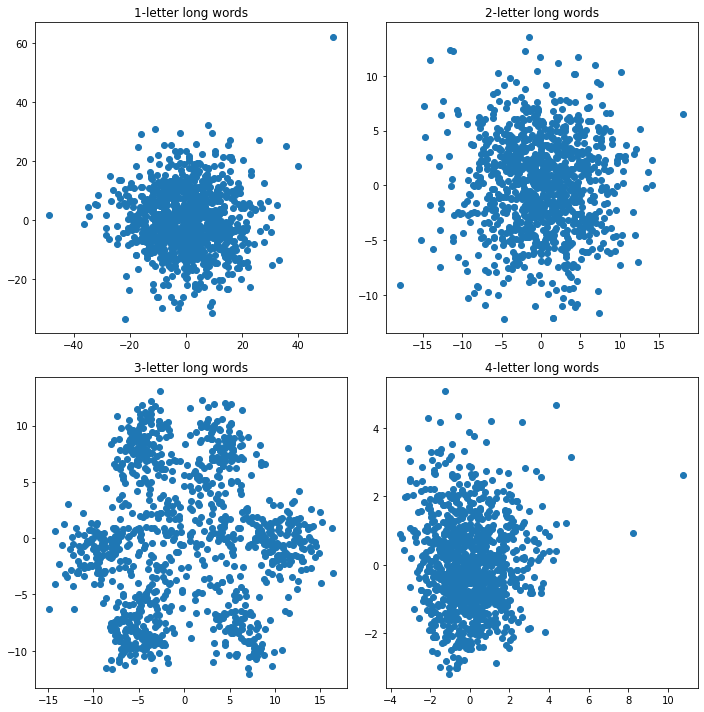

In [354]:
plot_data(l,strings_list,comb_list)

### K-means for 3-letter long words case

In [395]:
def plot_kmeans(df):    
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    X=scaler.fit_transform(df)   
    plt.figure(figsize=(13,7))
    for i in range(2):
        i=i+1       
        k=5+i
        from sklearn.cluster import KMeans
        kmeans= KMeans(n_clusters=k, random_state=0)
        kmeans.fit(X)
        y_kmeans=y_kmeans = kmeans.predict(X)

        from sklearn.decomposition import PCA
        pca = PCA(n_components=2)
        X=pca.fit_transform(X)
        plt.subplot(1,2,i)
        plt.tight_layout() 
        plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=10, cmap='plasma',marker="s")
        plt.title(f'k-means with k={k}')
    plt.show()

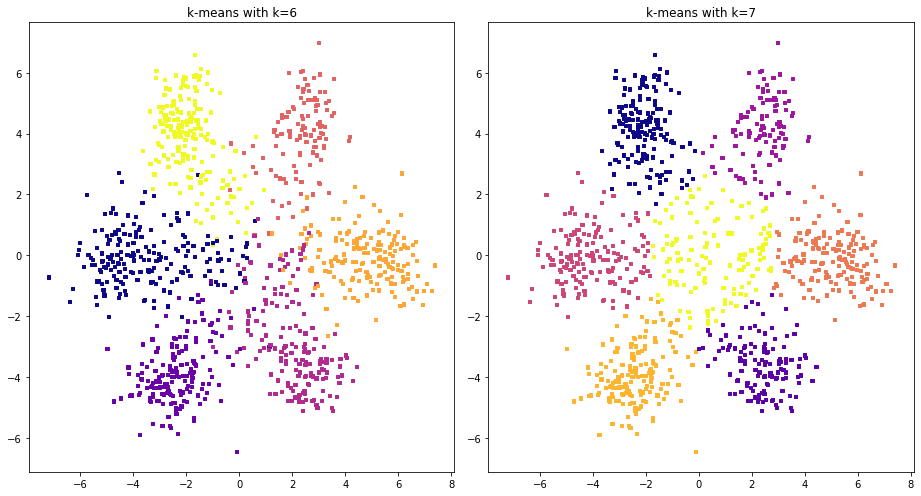

In [396]:
plot_kmeans(df_3_letter_words)